In [6]:
from skimage.feature import graycomatrix, graycoprops
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [3]:
DATASET_PATH = "/Users/firmansyahsundana/Documents/research/computer_science/plant-diseases-classification/Datasets/New Plant Diseases Dataset(Augmented)/train"

# Data Preparation

In [4]:
imgs = []
labels = []

for folder in os.listdir(DATASET_PATH):
    for i, img in enumerate(os.listdir(os.path.join(DATASET_PATH, folder))):
        img = cv.imread(os.path.join(DATASET_PATH, folder, img))
        gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        imgs.append(gray)
        labels.append(folder)
        

NotADirectoryError: [Errno 20] Not a directory: '/Users/firmansyahsundana/Documents/research/computer_science/plant-diseases-classification/Datasets/New Plant Diseases Dataset(Augmented)/train/.DS_Store'

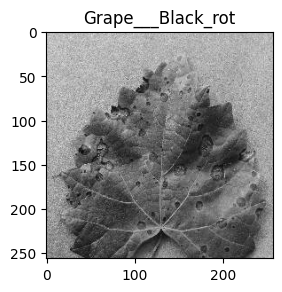

In [6]:
plt.figure(figsize=(10,10))
plt.subplot(331);plt.imshow(imgs[3000],cmap="grey");plt.title(labels[3000])
plt.show()

## Feature Extraction

### Grey-Level Co-Occurence Matrix (GLCM)

In [7]:
# glcm calculation
def calc_glcm_all_agls(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    glcm = graycomatrix(img,
                        distances=dists,
                        angles=agls,
                        levels=lvl,
                        symmetric=sym,
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in graycoprops(glcm, name)[0]]
    for item in glcm_props:
        feature.append(item)
    feature.append(label)
    return feature

In [10]:
def calc_glcm_all_agls(img, label, props, dists=[5], agls=[0, np.pi/4, np.pi/2, 3*np.pi/4], lvl=256, sym=True, norm=True):
    glcm = graycomatrix(img,
                        distances=dists,
                        angles=agls,
                        levels=lvl,
                        symmetric=sym,
                        normed=norm)
    feature = []
    glcm_props = [propery for name in props for propery in graycoprops(glcm, name)[0]]
    for item in glcm_props:
        feature.append(item)
    feature.append(label)
    return feature


properties = ['dissimilarity', 'correlation', 'homogeneity', 'contrast', 'ASM', 'energy']

glcm_all_agls = []
for img, label in zip(imgs, labels):
    glcm_all_agls.append(
        calc_glcm_all_agls(
            img,
            label,
            props=properties
        )
    )


columns = []
angels = ['0', '45', '90', '135']
for name in properties:
    for ang in angels:
        columns.append(name + "_" + ang)

columns.append("label")

In [11]:
import pandas as pd

glcm_df = pd.DataFrame(glcm_all_agls,
                        columns = columns)

# Save to csv
glcm_df.to_csv("glcm_plant_diseases_dataset.csv")

In [8]:
DATA_PATH = "//Users/firmansyahsundana/Documents/research/computer_science/plant-diseases-classification/glcm_plant_diseases_dataset.csv"

## Load GLCM feature

In [9]:
df = pd.read_csv(DATA_PATH)
df.head()

,Unnamed: 0,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,...,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135,label
0,0,26.078888,29.719781,30.291101,29.058736,0.732233,0.648406,0.632057,0.660605,0.052624,...,1773.189783,0.000085,0.000077,0.000077,0.000078,0.009218,0.008773,0.008762,0.008806,Strawberry___healthy
1,1,27.608612,29.424619,28.767057,29.325003,0.756590,0.730810,0.742741,0.729970,0.162452,...,2204.405596,0.011748,0.010511,0.011895,0.010564,0.108389,0.102523,0.109066,0.102780,Strawberry___healthy
2,2,26.030441,26.325476,25.095353,25.727686,0.600527,0.595977,0.632399,0.615211,0.049289,...,1291.368119,0.000088,0.000086,0.000088,0.000086,0.009370,0.009265,0.009379,0.009301,Strawberry___healthy
3,3,22.615802,24.507716,23.441826,23.408132,0.783122,0.754102,0.773607,0.769547,0.167986,...,1370.732710,0.012138,0.010932,0.012201,0.011084,0.110171,0.104555,0.110457,0.105282,Strawberry___healthy
4,4,28.360153,29.309177,28.974057,29.479907,0.738818,0.726535,0.728838,0.716637,0.165986,...,2274.678005,0.012224,0.011020,0.012521,0.011140,0.110563,0.104974,0.111899,0.105548,Strawberry___healthy


## Prepare training and testing data

In [11]:
X = df.iloc[:,1:-1]
y = df.label

In [13]:
X.describe()

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_90,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135
count,70295.000000,70295.000000,70295.000000,70295.000000,70295.000000,70295.000000,70295.000000,70295.000000,70295.000000,70295.000000,...,70295.000000,70295.000000,70295.000000,70295.000000,70295.000000,70295.000000,70295.000000,70295.000000,70295.000000,70295.000000
mean,19.436079,20.135953,19.303411,20.063834,0.739177,0.722647,0.743841,0.724272,0.110895,0.106065,...,952.653578,1021.875484,0.007337,0.007066,0.007520,0.007073,0.036656,0.035716,0.036963,0.035744
std,6.788228,6.970421,6.913985,6.965814,0.119665,0.125144,0.122436,0.125913,0.085766,0.083842,...,580.319081,607.270169,0.037185,0.036270,0.037804,0.036285,0.077419,0.076092,0.078448,0.076127
min,1.738515,1.617032,1.313870,1.995827,0.116316,0.081365,0.133491,0.096181,0.022350,0.022868,...,10.890392,16.877787,0.000036,0.000036,0.000038,0.000036,0.005963,0.005979,0.006155,0.005990
25%,13.996024,14.566193,13.669891,14.501354,0.673206,0.651585,0.676636,0.652805,0.063639,0.061105,...,465.263400,514.276219,0.000122,0.000118,0.000122,0.000118,0.011029,0.010848,0.011048,0.010848
50%,19.657028,20.258503,19.380680,20.121032,0.758402,0.741317,0.763017,0.743572,0.086044,0.082197,...,900.314461,968.564390,0.000200,0.000191,0.000200,0.000192,0.014135,0.013829,0.014127,0.013845
75%,24.352426,25.222435,24.320157,25.146030,0.825925,0.814651,0.832611,0.817341,0.125904,0.118506,...,1323.559372,1414.854938,0.000384,0.000363,0.000380,0.000364,0.019603,0.019064,0.019495,0.019067
max,59.944706,59.527211,54.208198,58.820106,0.981282,0.989941,0.995687,0.989949,0.929973,0.931969,...,5387.154025,5865.790738,0.831139,0.829852,0.841030,0.827945,0.911668,0.910962,0.917077,0.909915


In [12]:
X.head()

,dissimilarity_0,dissimilarity_45,dissimilarity_90,dissimilarity_135,correlation_0,correlation_45,correlation_90,correlation_135,homogeneity_0,homogeneity_45,...,contrast_90,contrast_135,ASM_0,ASM_45,ASM_90,ASM_135,energy_0,energy_45,energy_90,energy_135
0,26.078888,29.719781,30.291101,29.058736,0.732233,0.648406,0.632057,0.660605,0.052624,0.046782,...,1911.066002,1773.189783,0.000085,0.000077,0.000077,0.000078,0.009218,0.008773,0.008762,0.008806
1,27.608612,29.424619,28.767057,29.325003,0.756590,0.730810,0.742741,0.729970,0.162452,0.152470,...,2129.446838,2204.405596,0.011748,0.010511,0.011895,0.010564,0.108389,0.102523,0.109066,0.102780
2,26.030441,26.325476,25.095353,25.727686,0.600527,0.595977,0.632399,0.615211,0.049289,0.049763,...,1231.657013,1291.368119,0.000088,0.000086,0.000088,0.000086,0.009370,0.009265,0.009379,0.009301
3,22.615802,24.507716,23.441826,23.408132,0.783122,0.754102,0.773607,0.769547,0.167986,0.157902,...,1370.528698,1370.732710,0.012138,0.010932,0.012201,0.011084,0.110171,0.104555,0.110457,0.105282
4,28.360153,29.309177,28.974057,29.479907,0.738818,0.726535,0.728838,0.716637,0.165986,0.158304,...,2205.851952,2274.678005,0.012224,0.011020,0.012521,0.011140,0.110563,0.104974,0.111899,0.105548


In [17]:
y.describe()

count                 70295
unique                   38
top       Soybean___healthy
freq                   2022
Name: label, dtype: object

## Normalize Data

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[ 0.97858459,  1.37493799,  1.58920925, ..., -0.35408714,
        -0.35947886, -0.3538509 ],
       [ 1.20393585,  1.33259268,  1.36877843, ...,  0.87799134,
         0.91912978,  0.88059317],
       [ 0.97144765,  0.88797598,  0.83771998, ..., -0.34761649,
        -0.35162247, -0.34735829],
       ...,
       [ 0.79401225,  0.94893886,  0.76912755, ..., -0.33477364,
        -0.33797217, -0.33293613],
       [ 0.00783913, -0.14877017, -0.05070656, ..., -0.24766527,
        -0.25233819, -0.24439758],
       [ 0.49652356,  0.47710857,  0.53154693, ..., -0.32529772,
        -0.33107657, -0.32575627]])

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
len(X_train), len(X_test)

(56236, 14059)

# Methods

## SVM

In [22]:
from sklearn.svm import SVC

svm = SVC(kernel='linear', decision_function_shape='ovr', random_state=42)
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [23]:
from sklearn.metrics import classification_report

y_pred = svm.predict(X_test)
print(classification_report(y_test, y_pred))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.40      0.24      0.30       411
                                 Apple___Black_rot       0.28      0.28      0.28       409
                          Apple___Cedar_apple_rust       0.48      0.54      0.51       366
                                   Apple___healthy       0.30      0.45      0.36       408
                               Blueberry___healthy       0.33      0.27      0.29       363
          Cherry_(including_sour)___Powdery_mildew       0.43      0.60      0.50       336
                 Cherry_(including_sour)___healthy       0.62      0.65      0.63       417
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.66      0.59      0.62       342
                       Corn_(maize)___Common_rust_       0.94      0.94      0.94       359
               Corn_(maize)___Northern_Leaf_Blight       0.63      0.77      0.

## Naive Bayes

In [26]:
# Scale data for Naive Bayes between 0 and 1
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train_min_max_scaled = min_max_scaler.transform(X_train)
X_train_min_max_scaled

array([[0.31271994, 0.30087573, 0.30184965, ..., 0.00888451, 0.00876101,
        0.00882444],
       [0.47114543, 0.45750589, 0.45074886, ..., 0.00308118, 0.0030407 ,
        0.0029921 ],
       [0.58027187, 0.62233332, 0.595757  , ..., 0.00219765, 0.00271057,
        0.00241539],
       ...,
       [0.45006417, 0.45517342, 0.46299025, ..., 0.0034372 , 0.00325449,
        0.00332968],
       [0.45608955, 0.44191699, 0.43143934, ..., 0.00647365, 0.00665597,
        0.00645707],
       [0.52255149, 0.54649225, 0.53208568, ..., 0.00562889, 0.00555744,
        0.0057509 ]])

In [28]:
from sklearn.naive_bayes import MultinomialNB

nb = MultinomialNB()
nb.fit(X_train_min_max_scaled, y_train)

MultinomialNB()

In [29]:
y_nb_pred = nb.predict(X_test)

print(classification_report(y_test, y_nb_pred))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.00      0.00      0.00       411
                                 Apple___Black_rot       0.00      0.00      0.00       409
                          Apple___Cedar_apple_rust       0.39      0.18      0.25       366
                                   Apple___healthy       0.00      0.00      0.00       408
                               Blueberry___healthy       0.00      0.00      0.00       363
          Cherry_(including_sour)___Powdery_mildew       0.00      0.00      0.00       336
                 Cherry_(including_sour)___healthy       0.00      0.00      0.00       417
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.00      0.00      0.00       342
                       Corn_(maize)___Common_rust_       0.27      0.96      0.42       359
               Corn_(maize)___Northern_Leaf_Blight       0.00      0.00      0.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

## Random Forest

In [30]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_rf_pred = rf.predict(X_test)
print(classification_report(y_test, y_rf_pred))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.51      0.26      0.34       411
                                 Apple___Black_rot       0.49      0.34      0.40       409
                          Apple___Cedar_apple_rust       0.69      0.73      0.71       366
                                   Apple___healthy       0.47      0.49      0.48       408
                               Blueberry___healthy       0.54      0.45      0.49       363
          Cherry_(including_sour)___Powdery_mildew       0.54      0.73      0.62       336
                 Cherry_(including_sour)___healthy       0.72      0.82      0.77       417
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.81      0.67      0.73       342
                       Corn_(maize)___Common_rust_       0.96      0.97      0.96       359
               Corn_(maize)___Northern_Leaf_Blight       0.74      0.91      0.

## XGBoost

In [39]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Convert data to DMatrix format for XGBoost
dtrain = xgb.DMatrix(X_train, label=y_train_encoded)
dtest = xgb.DMatrix(X_test, label=y_test_encoded)

In [40]:
# Hyperparameters for XGBoost
params = {
    'objective': 'multi:softmax',
    'num_class': 38,
    'max_depth': 6,
    'eta': 0.3,
    'subsample': 0.8,
    'colsample_bytree': 0.8
}

num_round = 100
bst = xgb.train(params, dtrain, num_round)

In [41]:
# Predict labels for test set
y_pred_encoded = bst.predict(dtest)

# Decode labels
y_bst_pred = label_encoder.inverse_transform(y_pred_encoded.astype(int))
print(classification_report(y_test, y_bst_pred))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.47      0.27      0.34       411
                                 Apple___Black_rot       0.45      0.37      0.41       409
                          Apple___Cedar_apple_rust       0.68      0.77      0.72       366
                                   Apple___healthy       0.42      0.43      0.42       408
                               Blueberry___healthy       0.50      0.41      0.45       363
          Cherry_(including_sour)___Powdery_mildew       0.61      0.66      0.63       336
                 Cherry_(including_sour)___healthy       0.78      0.81      0.80       417
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.81      0.70      0.75       342
                       Corn_(maize)___Common_rust_       0.96      0.96      0.96       359
               Corn_(maize)___Northern_Leaf_Blight       0.76      0.87      0.

## Neural Network

In [48]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

In [51]:
# Convert DataFrame to PyTorch Tensor
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_encoded, dtype=torch.long)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test_encoded, dtype=torch.float32)

# Create DataLoader for training and testing sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x4c7f85c40>,
 <torch.utils.data.dataloader.DataLoader at 0x4c79c7830>)

In [72]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )

    def forward(self, x):
        return self.layer_stack(x)

In [73]:
# Instantiate the model, loss function, and optimizer

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(neural_network.parameters(), lr=0.001)

neural_network = NeuralNetwork(
    input_shape = 24, # Num of features
    hidden_units = 512,
    output_shape = 38 # Num of classes
)

neural_network.to("cpu")

NeuralNetwork(
  (layer_stack): Sequential(
    (0): Linear(in_features=24, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=38, bias=True)
  )
)

In [74]:
EPOCHS = 50

for epoch in range(EPOCHS):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = neural_network(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

    # Print training loss after each epoch
    print(f"Epoch {epoch+1}, Loss: {loss.item()}")

# Evaluate the model on the test set
neural_network.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = neural_network(inputs)
        _, predicted = torch.max(outputs, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f"Accuracy: {correct/total}")

Epoch 1, Loss: 3.6330878734588623
Epoch 2, Loss: 3.64900803565979
Epoch 3, Loss: 3.6293389797210693
Epoch 4, Loss: 3.648768663406372
Epoch 5, Loss: 3.6409912109375
Epoch 6, Loss: 3.6477582454681396
Epoch 7, Loss: 3.641456365585327
Epoch 8, Loss: 3.6441659927368164
Epoch 9, Loss: 3.6499173641204834
Epoch 10, Loss: 3.6379776000976562
Epoch 11, Loss: 3.647620439529419
Epoch 12, Loss: 3.6359047889709473
Epoch 13, Loss: 3.643897771835327
Epoch 14, Loss: 3.6514222621917725
Epoch 15, Loss: 3.6356287002563477
Epoch 16, Loss: 3.6203153133392334
Epoch 17, Loss: 3.6438820362091064
Epoch 18, Loss: 3.6445891857147217
Epoch 19, Loss: 3.6412835121154785
Epoch 20, Loss: 3.6378884315490723
Epoch 21, Loss: 3.6461305618286133
Epoch 22, Loss: 3.6404471397399902
Epoch 23, Loss: 3.6502485275268555
Epoch 24, Loss: 3.6419084072113037
Epoch 25, Loss: 3.647014856338501
Epoch 26, Loss: 3.651650905609131
Epoch 27, Loss: 3.6456916332244873
Epoch 28, Loss: 3.6402382850646973
Epoch 29, Loss: 3.6450510025024414
Epoch

## Convolutional Autoencoder

Metode ini diaplikasikan oleh Pardede, dkk dalam https://ieeexplore.ieee.org/document/8629518 dengan akurasi tertinggi pada dataset Plant Village 38 kelas mencapai 87%.

In [76]:
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split

transform = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor()
])

dataset = ImageFolder(root=DATASET_PATH, transform=transform)

train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size

train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [78]:
# Create dataloader
BATCH_SIZE = 32

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=BATCH_SIZE, shuffle=False)

train_loader, test_loader

(<torch.utils.data.dataloader.DataLoader at 0x4baef5970>,
 <torch.utils.data.dataloader.DataLoader at 0x4bda0e2a0>)

In [80]:
train_features_batch, train_labels_batch = next(iter(train_loader))

print(f"Image shape: {train_features_batch.shape} -> [batch_size, color_channels, height, width]")
print(f"Label shape: {train_labels_batch.shape}")

Image shape: torch.Size([32, 3, 64, 64]) -> [batch_size, color_channels, height, width]
Label shape: torch.Size([32])


In [88]:
class ConvolutionalAutoencoder(nn.Module):
    def __init__(self, input_shape: int, output_shape :int):
        super().__init__()
        self.encoder = nn.Sequential(
            nn.Conv2d(
                in_channels = input_shape,
                out_channels = 5,
                kernel_size = 3,
            ),
            nn.MaxPool2d(
                kernel_size = 3
            ),
            nn.Conv2d(
                in_channels = 5,
                out_channels = 6,
                kernel_size = 3
            ),
            nn.MaxPool2d(
                kernel_size = 3
            ),
            nn.Conv2d(
                in_channels = 6,
                out_channels = 7,
                kernel_size = 3,
            ),
            nn.Conv2d(
                in_channels = 7,
                out_channels = 8,
                kernel_size = 3
            )
        )

        self.decoder = nn.Sequential(
            nn.Upsample(scale_factor=2, mode="nearest"),
            nn.Conv2d(
                in_channels = 8,
                out_channels = 5,
                kernel_size = 3
            ),
            nn.Upsample(scale_factor=2, mode="nearest"),
            nn.Conv2d(
                in_channels = 5,
                out_channels = 4,
                kernel_size = 3
            ),
            nn.Upsample(scale_factor=2, mode="nearest"),
            nn.Conv2d(
                in_channels = 4,
                out_channels = 3,
                kernel_size = 3
            ),
        )

        self.svm = nn.Sequential(
            nn.Flatten(),
            nn.Linear(
                in_features=(64*64*3),
                out_features = output_shape
            )
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        x = self.svm(x)
        return x

In [89]:
convolutional_autoencoder = ConvolutionalAutoencoder(
    input_shape = 3,
    output_shape = 38
)

convolutional_autoencoder

ConvolutionalAutoencoder(
  (encoder): Sequential(
    (0): Conv2d(3, 5, kernel_size=(3, 3), stride=(1, 1))
    (1): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (2): Conv2d(5, 6, kernel_size=(3, 3), stride=(1, 1))
    (3): MaxPool2d(kernel_size=3, stride=3, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(6, 7, kernel_size=(3, 3), stride=(1, 1))
    (5): Conv2d(7, 8, kernel_size=(3, 3), stride=(1, 1))
  )
  (decoder): Sequential(
    (0): Upsample(scale_factor=2.0, mode='nearest')
    (1): Conv2d(8, 5, kernel_size=(3, 3), stride=(1, 1))
    (2): Upsample(scale_factor=2.0, mode='nearest')
    (3): Conv2d(5, 4, kernel_size=(3, 3), stride=(1, 1))
    (4): Upsample(scale_factor=2.0, mode='nearest')
    (5): Conv2d(4, 3, kernel_size=(3, 3), stride=(1, 1))
  )
  (svm): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=12288, out_features=38, bias=True)
  )
)

In [92]:
# Define the hinge loss
def hinge_loss(scores, labels):
    return torch.mean(torch.max(torch.zeros_like(labels), 1 - labels * scores))


optimizer = torch.optim.SGD(params=convolutional_autoencoder.parameters(), lr=0.01)

In [93]:
# Training loop

EPOCHS = 1
for epoch in range(EPOCHS):
    for batch, (X, y) in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred = convolutional_autoencoder(X)
        loss = hinge_loss(y_pred, y)
        loss.backward()
        optimizer.step()

    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item()}")


# Calculate accuracy
accuracy = torch.mean((predicted_labels == y_tensor).float())
print("Accuracy:", accuracy.item())

RuntimeError: mat1 and mat2 shapes cannot be multiplied (32x12 and 12288x38)